### Практическое задание
1. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?


Нормализация и стандартизация - это два разных метода масштабирования признаков в машинном обучении.

**Нормализация**: Этот метод масштабирует значения признаков таким образом, чтобы они попадали в заданный диапазон, обычно от 0 до 1. Это делается путем вычитания минимального значения признака из каждого значения и затем деления на разницу между максимальным и минимальным значениями признака.

**Стандартизация**: Этот метод центрирует значения признаков вокруг их среднего значения и масштабирует их так, чтобы они имели единичное стандартное отклонение. Это достигается путем вычитания среднего значения признака и деления на стандартное отклонение.

Оба метода независимо друг от друга применяются к каждому признаку. Применение и нормализации, и стандартизации к одному и тому же признаку не имеет смысла и может привести к нежелательным результатам, так как они оба изменят значения признаков, но по-разному.

Лучше всего применить их отдельно к разным наборам признаков или выбрать один из методов, который лучше подходит для конкретной задачи.

2. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [54]:
import numpy as np

f(x, W) + (lambda_/2) * np.sum(np.abs(W))

In [55]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [56]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [57]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [58]:
X_st = X.copy().astype(np.float64)
X_st[1] = calc_std_fit(X[1])
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [59]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [60]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        # Градиент функции потерь с L1-регуляризацией
        grad = (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        W -= alpha * grad
    return W


In [61]:
W = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)
W

array([56.49995   ,  6.30286274, -0.35565596,  6.57092884])

- array([56.4999999 ,  6.16900869,  0.27834189,  6.05005797]) для классического градиентного спуска
- array([56.5106203 ,  6.31268859, -0.36442638,  6.5844895 ]) для стахостического спуска
- array([56.49717514,  6.30231751, -0.35424091,  6.56978425]) для L2 регуляризация

Как видно из представленных результатов, что L1  показывает близкий результат к остальным градиентным спускам

3. Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [62]:
from sklearn import datasets
import matplotlib.pyplot as plt

X, Y, coef = datasets.make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
display(X, Y, coef)

array([[-0.71760732, -1.09367119, -0.73597009, ..., -0.09194752,
         0.77271648, -0.5294093 ],
       [-0.21856062, -0.43937009,  1.17601766, ..., -0.44205731,
         0.65967443, -0.5364636 ],
       [-0.09232329, -0.04777714,  0.58128624, ..., -0.64041891,
         1.29076796, -0.34530826],
       ...,
       [-0.1724219 ,  1.20477844,  0.77081956, ...,  1.78646758,
        -0.59041036, -0.6747931 ],
       [ 0.93830193, -0.05266006,  1.45767292, ..., -1.01765261,
         0.02393901,  1.37086726],
       [-0.99582701,  1.30720547, -0.04855569, ...,  1.85683052,
        -0.26133944,  0.50888458]])

array([-133.10543687,   44.01778172,   48.98233093, ..., -271.14963388,
        161.66813826,  380.05918834])

array([8.03590530e+00, 9.63394753e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.86058430e+01, 0.00000000e+00, 0.00000000e+00,
       9.61298231e+01, 5.95379955e+01, 0.00000000e+00, 3.30583257e+01,
       3.71965212e+01, 6.59198012e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.78539772e+01, 0.00000000e+00, 7.36381949e+01])

Градиентный спуск

In [63]:
def standard_scale(X):
    '''Масштабирование стандартизацией'''
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [64]:
X = standard_scale(X)

In [65]:
def calc_mse(y, y_pred):
    '''Среднеквадратичая ошибка'''
    err = np.mean((y - y_pred)**2)
    return err

In [70]:
def w():
    np.random.seed(9)
    return np.random.randn(X.shape[1])

In [71]:
def gradient_descent(W, X, y, iterations, eta=1e-4):
    '''Классический градиентный спуск'''
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [72]:
%%time
weights_gd, err_gd, w_gd = gradient_descent(w(), X, Y, iterations=5000, eta=1e-3)

Iter: 0, error 27979.272752767254
Iter: 500, error 3738.232217575069
Iter: 1000, error 518.6388255248817
Iter: 1500, error 90.72566724830708
Iter: 2000, error 33.811992742915194
Iter: 2500, error 26.236945851143123
Iter: 3000, error 25.228011523637203
Iter: 3500, error 25.093533811524274
Iter: 4000, error 25.075596872220995
Iter: 4500, error 25.07320268805145
MSE: 25.072882888141045
CPU times: total: 1min 25s
Wall time: 1min 59s


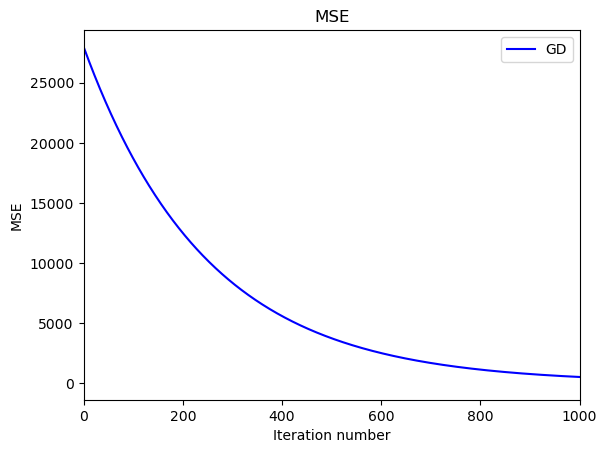

In [73]:
plt.plot(range(len(err_gd)), err_gd, color='b', label='GD')
# plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend()

In [74]:
def stohastic_gradient_descent(W, X, Y, iterations, eta=1e-4, size=1):
    n = X.shape[0] 
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list

In [75]:
init_W

array([ 1.10855471e-03, -2.89544069e-01, -1.11606630e+00, -1.28827567e-02,
       -3.78361464e-01, -4.81135363e-01, -1.51733118e+00, -4.90871981e-01,
       -2.40680579e-01, -6.47947460e-01,  6.35891080e-01,  1.74011731e+00,
        2.96682218e-01,  7.07503662e-01,  1.82281576e+00,  4.30769029e-01,
        1.54272963e+00, -9.00721171e-01, -1.37125010e-01,  1.29757901e+00])

In [76]:
%%time
weights_sgd, err_sgd, w_sgd = stohastic_gradient_descent(w(), X, Y, iterations=5000, eta=1e-3, size=1)

Iter: 0, error 27940.77081989326
Iter: 500, error 3909.816186117472
Iter: 1000, error 706.2521418796898
Iter: 1500, error 120.35629563367924
Iter: 2000, error 39.60425259602933
Iter: 2500, error 28.22301680954602
Iter: 3000, error 25.817348849230516
Iter: 3500, error 25.704226689560503
Iter: 4000, error 25.595371308044225
Iter: 4500, error 25.525400398020874
Final MSE: 25.42803342673532
CPU times: total: 14.6 s
Wall time: 19.3 s


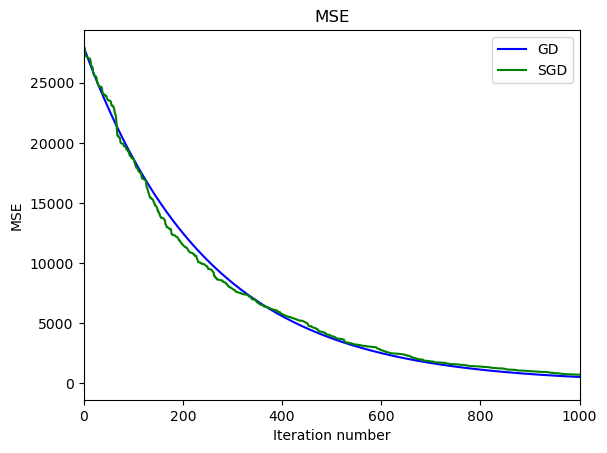

In [77]:
plt.plot(range(len(err_gd)), err_gd, color='b', label='GD')
plt.plot(range(len(err_sgd)), err_sgd, color='g', label='SGD')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend()

Из кода видно, что при одинаковом количестве итераций скорость выполнения стохастического градиентного спуска гораздо выше(в 4 раза), при этом из графика видно, что линия стохастического градиентного спуска не гладкая, но при этом имеет такое же значение при окончании схождения функции